# Exercise 4 Neural Network Learning

### Initialization

In [1]:
%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

### Part 1: Loading and Visualizing Data

Loading and Visualizing Data ...


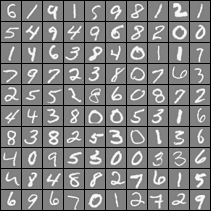

In [2]:
fprintf('Loading and Visualizing Data ...\n')

load('ex4data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

### Part 2: Loading Parameters

In this part of the exercise, we load some pre-initialized neural network parameters.

In [3]:
fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];

fprintf('Loaded Saved Neural Network Parameters ...\n')


Loading Saved Neural Network Parameters ...
Loaded Saved Neural Network Parameters ...


### Part 3: Compute Cost (Feedforward)
To the neural network, you should first start by implementing the feedforward part of the neural network that returns the cost only. You should complete the code in nnCostFunction.m to return cost. After implementing the feedforward to compute the cost, you can verify that your implementation is correct by verifying that you get the same cost as us for the fixed debugging parameters.

We suggest implementing the feedforward cost *without* regularization first so that it will be easier for you to debug. Later, in part 4, you will get to implement the regularized cost.

In [4]:
fprintf('\nFeedforward Using Neural Network ...\n')

% Weight regularization parameter (we set this to 0 here).
lambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);


Feedforward Using Neural Network ...
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


### Part 4: Implement Regularization

Once your cost function implementation is correct, you should now continue to implement the regularization with the cost.

In [5]:
fprintf('\nChecking Cost Function (w/ Regularization) ... \n')

% Weight regularization parameter (we set this to 1 here).
lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);


Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


### Part 5: Sigmoid Gradient

Before you start implementing the neural network, you will first implement the gradient for the sigmoid function. You should complete the code in the sigmoidGradient.m file.

In [7]:
fprintf('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);
fprintf('\n\n');


Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
0.196612 0.235004 0.250000 0.235004 0.196612 




### Part 6: Initializing Parameters

In this part of the exercise, you will be starting to implement a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network (randInitializeWeights.m).

In [11]:
fprintf('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


Initializing Neural Network Parameters ...


### Part 7: Implement Backpropagation

Once your cost matches up with ours, you should proceed to implement the backpropagation algorithm for the neural network. You should add to the code you've written in nnCostFunction.m to return the partial derivatives of the parameters.

In [43]:
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;


Checking Backpropagation... 
  -0.0092782524  -0.0092782524
   0.0088991196   0.0088991196
  -0.0083601076  -0.0083601076
   0.0076281355   0.0076281355
  -0.0067479837  -0.0067479837
  -0.0000030498  -0.0000030498
   0.0000142869   0.0000142869
  -0.0000259383  -0.0000259383
   0.0000369883   0.0000369883
  -0.0000468760  -0.0000468760
  -0.0001750601  -0.0001750601
   0.0002331464   0.0002331464
  -0.0002874687  -0.0002874687
   0.0003353203   0.0003353203
  -0.0003762156  -0.0003762156
  -0.0000962661  -0.0000962661
   0.0001179827   0.0001179827
  -0.0001371497  -0.0001371497
   0.0001532471   0.0001532471
  -0.0001665603  -0.0001665603
   0.3145449700   0.3145449701
   0.1110565882   0.1110565882
   0.0974006970   0.0974006970
   0.1640908188   0.1640908188
   0.0575736493   0.0575736493
   0.0504575855   0.0504575855
   0.1645679323   0.1645679323
   0.0577867379   0.0577867378
   0.0507530173   0.0507530173
   0.1583393339   0.1583393339
   0.0559235296   0.0559235296
   0.0491

### Part 8: Implement Regularization

Once your backpropagation implementation is correct, you should now continue to implement the regularization with the cost and gradient.

In [55]:
fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);

% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);


Checking Backpropagation (w/ Regularization) ... 
  -0.009278252  -0.009278252
   0.008899120   0.008899120
  -0.008360108  -0.008360108
   0.007628136   0.007628136
  -0.006747984  -0.006747984
  -0.016767980  -0.016767980
   0.039433483   0.039433483
   0.059335556   0.059335556
   0.024764097   0.024764097
  -0.032688143  -0.032688143
  -0.060174472  -0.060174472
  -0.031961229  -0.031961229
   0.024922553   0.024922553
   0.059771762   0.059771762
   0.038641055   0.038641055
  -0.017370465  -0.017370465
  -0.057565867  -0.057565867
  -0.045196385  -0.045196385
   0.009145880   0.009145880
   0.054610155   0.054610155
   0.314544970   0.314544970
   0.111056588   0.111056588
   0.097400697   0.097400697
   0.118682669   0.118682669
   0.000038193   0.000038193
   0.033692656   0.033692656
   0.203987128   0.203987128
   0.117148233   0.117148233
   0.075480126   0.075480126
   0.125698067   0.125698067
  -0.004075883  -0.004075883
   0.016967709   0.016967709
   0.176337550   0.17

### Part 9: Training NN

You have now implemented all the code necessary to train a neural network. To train your neural network, we will now use "fmincg", which is a function which works similarly to "fminunc". Recall that these advanced optimizers are able to train our cost functions efficiently as long as we provide them with the gradient computations.

In [56]:
fprintf('\nTraining Neural Network... \n')

%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 50);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));


Training Neural Network... 
Iteration    50 | Cost: 4.834383e-01


### Part 10: Visualize Weights

You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.


Visualizing Neural Network... 


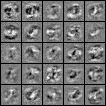

In [57]:
fprintf('\nVisualizing Neural Network... \n')

displayData(Theta1(:, 2:end));

### Part 11: Implement Predict

After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

In [58]:
pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.440000
